In [163]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [165]:
df2_ = pd.read_csv('./csv/gp_ts/gp_ts_2.csv')
df2_

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
0,0.1,0.6,0.05,0.05,0.05,125,1
1,0.1,0.6,0.05,0.05,0.10,108,1
2,0.1,0.6,0.05,0.05,0.15,153,1
3,0.1,0.6,0.05,0.05,0.20,143,1
4,0.1,0.6,0.05,0.05,0.25,131,1
...,...,...,...,...,...,...,...
34339,0.3,0.6,0.30,0.30,0.10,75,45
34340,0.3,0.6,0.30,0.30,0.15,88,45
34341,0.3,0.6,0.30,0.30,0.20,112,45
34342,0.3,0.6,0.30,0.30,0.25,110,45


In [166]:
def plot_parameter_analysis(df):
    lev = [i for i in range(0, 190, 10)]
    
    # Noise-Beta Plot
    df2 = df
    df_subset1 = df2[['noise', 'alpha', 'beta', 'total_reward']]
    df_subset1 = df_subset1.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()
    
    pivot_table1 = df_subset1.pivot(index='noise', columns='beta', values='total_reward')
    pivot_table1 = pivot_table1.fillna(0)
    
    X1 = pivot_table1.columns.values
    Y1 = pivot_table1.index.values
    Z1 =  t_t_r - pivot_table1.values
    X1, Y1 = np.meshgrid(X1, Y1)
    
    # Alpha-Beta Plot
    df_subset2 = df2[['noise', 'alpha', 'beta', 'total_reward']]
    df_subset2 = df_subset2.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()
    
    pivot_table2 = df_subset2.pivot(index='alpha', columns='beta', values='total_reward')
    pivot_table2 = pivot_table2.fillna(0)
    
    X2 = pivot_table2.columns.values
    Y2 = pivot_table2.index.values
    Z2 = t_t_r - pivot_table2.values
    X2, Y2 = np.meshgrid(X2, Y2)
    
    # Alpha-Noise Plot
    df_subset3 = df2[['noise', 'alpha', 'beta', 'total_reward']]
    df_subset3 = df_subset3.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()
    
    pivot_table3 = df_subset3.pivot(index='alpha', columns='noise', values='total_reward')
    pivot_table3 = pivot_table3.fillna(0)
    
    X3 = pivot_table3.columns.values
    Y3 = pivot_table3.index.values
    Z3 = t_t_r - pivot_table3.values
    X3, Y3 = np.meshgrid(X3, Y3)
    
    # Create a figure
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot Noise-Beta
    c1 = axs[0].contour(X1, Y1, Z1,colors='black', levels=lev)
    c1.clabel(fmt='%1.1f', fontsize=8) 
    c1 = axs[0].contourf(X1, Y1, Z1,cmap='rainbow', levels=lev)  
    
    fig.colorbar(c1, ax=axs[0], label='total_reward')
    axs[0].set_xlabel('alpha')
    axs[0].set_ylabel('noise')
    axs[0].set_aspect('equal')
    
    # Plot Alpha-Beta
    c2 = axs[1].contour(X2, Y2, Z2,colors='black', levels=lev)
    c2.clabel(fmt='%1.1f', fontsize=8) 
    c2 = axs[1].contourf(X2, Y2, Z2,cmap='rainbow', levels=lev)  
    
    fig.colorbar(c2, ax=axs[1], label='total_reward')
    axs[1].set_xlabel('alpha')
    axs[1].set_ylabel('beta')
    axs[1].set_aspect('equal')
    
    # Plot Alpha-Noise
    
    c3 = axs[2].contour(X3, Y3, Z3,colors='black', levels=lev)
    c3.clabel(fmt='%1.1f', fontsize=8) 
    c3 = axs[2].contourf(X3, Y3, Z3,cmap='rainbow', levels=lev)  
    
    fig.colorbar(c3, ax=axs[2], label='total_reward')
    axs[2].set_xlabel('noise')
    axs[2].set_ylabel('beta')
    axs[2].set_aspect('equal')
    
    # Show the figure
    plt.tight_layout()
    # plt.show()
    plt.savefig("./img/gp-ucb_parameter_s03.png")

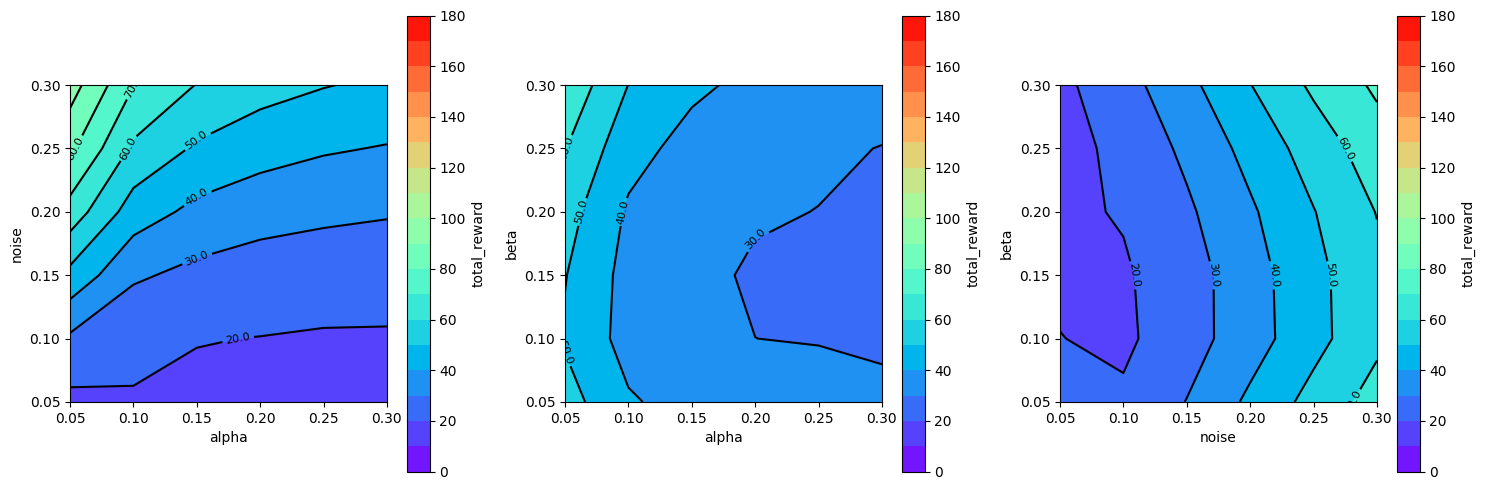

In [167]:
f_max = 0.6
f_sigma = 0.3
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]
n_play = 300
t_t_r = f_max * n_play
plot_parameter_analysis(df2)

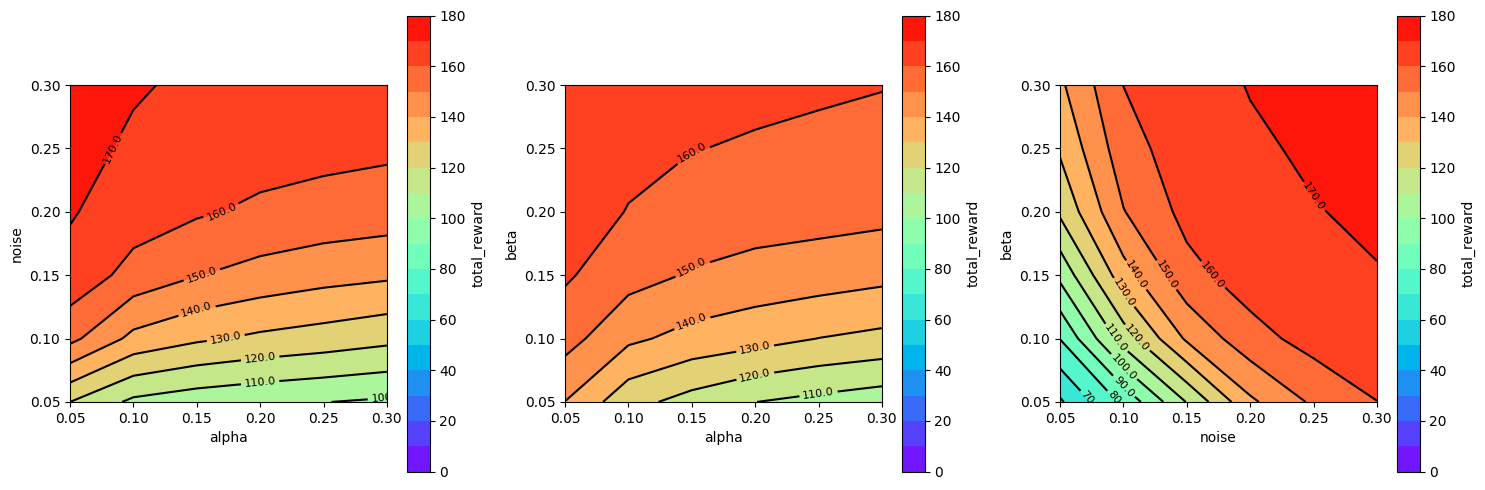

In [168]:
f_max = 0.6
f_sigma = 0.1
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play
plot_parameter_analysis(df2)

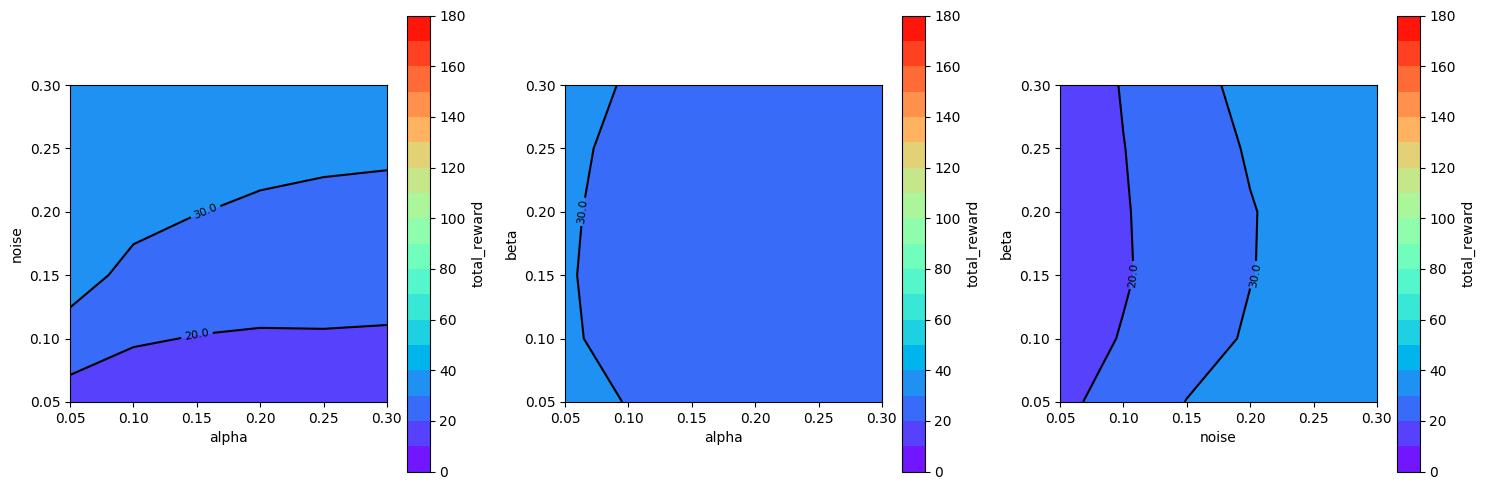

In [169]:
f_max = 0.2
f_sigma = 0.3
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play
plot_parameter_analysis(df2)

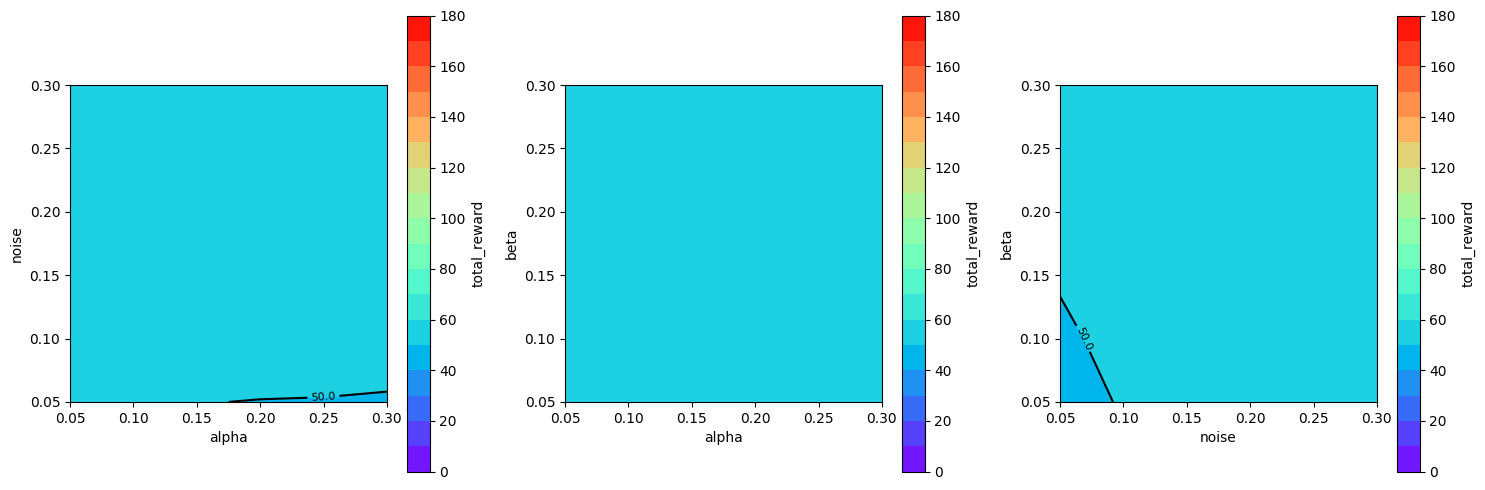

In [170]:
f_max = 0.2
f_sigma = 0.1
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play
plot_parameter_analysis(df2)

In [171]:
df = df2_[(df2_['f_max'] == 0.6) & (df2_['f_sigma'] == 0.3) ]
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.05) ]
record_count = len(f_df)
print("Number of records: ", record_count)

df = df2_[(df2_['f_max'] == 0.6) & (df2_['f_sigma'] == 0.1) ]
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.05) ]
record_count = len(f_df)
print("Number of records: ", record_count)

df = df2_[(df2_['f_max'] == 0.2) & (df2_['f_sigma'] == 0.3) ]
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.05) ]
record_count = len(f_df)
print("Number of records: ", record_count)

df = df2_[(df2_['f_max'] == 0.2) & (df2_['f_sigma'] == 0.1) ]
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.05) ]
record_count = len(f_df)
print("Number of records: ", record_count)

Number of records:  38
Number of records:  38
Number of records:  38
Number of records:  38


In [172]:
df_subset4 = df2_[(df2_['f_max'] == 0.6) & (df2_['f_sigma'] == 0.3) ]
df_subset4 = df_subset4.groupby(['noise', 'alpha', 'beta']).mean()
max_reward = df_subset4['total_reward'].max()
max_reward_records = df_subset4[df_subset4['total_reward'] == max_reward]
max_reward_records

,,,f_sigma,f_max,total_reward,seed
noise,alpha,beta,,,,
0.05,0.25,0.15,0.3,0.6,165.026316,24.947368


In [173]:
df_subset5 = df2_[(df2_['f_max'] == 0.6) & (df2_['f_sigma'] == 0.1) ]
df_subset5 = df_subset5.groupby(['noise', 'alpha', 'beta']).mean()
max_reward = df_subset5['total_reward'].max()
max_reward_records = df_subset5[df_subset5['total_reward'] == max_reward]
max_reward_records

,,,f_sigma,f_max,total_reward,seed
noise,alpha,beta,,,,
0.05,0.05,0.3,0.1,0.6,125.763158,24.947368


In [174]:
df_subset6 = df2_[(df2_['f_max'] == 0.2) & (df2_['f_sigma'] == 0.3) ]
df_subset6 = df_subset6.groupby(['noise', 'alpha', 'beta']).mean()
max_reward = df_subset6['total_reward'].max()
max_reward_records = df_subset6[df_subset6['total_reward'] == max_reward]
max_reward_records

,,,f_sigma,f_max,total_reward,seed
noise,alpha,beta,,,,
0.05,0.3,0.2,0.3,0.2,48.552632,26.5


In [175]:
df_subset7 = df2_[(df2_['f_max'] == 0.2) & (df2_['f_sigma'] == 0.1)]
df_subset7 = df_subset7.groupby(['noise', 'alpha', 'beta']).mean()
max_reward = df_subset7['total_reward'].max()
max_reward_records = df_subset7[df_subset7['total_reward'] == max_reward]
max_reward_records

,,,f_sigma,f_max,total_reward,seed
noise,alpha,beta,,,,
0.05,0.05,0.25,0.1,0.2,20.5,26.5


In [176]:
f_max, f_sigma  = 0.6, 0.3
df_subset4 = df2_[(df2_['f_sigma'] == f_sigma) & (df2_['f_max'] == f_max)]
df_subset4 = df_subset4.groupby(['noise', 'alpha', 'beta']).mean()
df_subset4['total_reward']  =  f_max*300 - df_subset4['total_reward'] 
df1= df_subset4.reset_index()

f_max, f_sigma  = 0.6, 0.1
df_subset4 = df2_[(df2_['f_sigma'] == f_sigma) & (df2_['f_max'] == f_max)]
df_subset4 = df_subset4.groupby(['noise', 'alpha', 'beta']).mean()
df_subset4['total_reward']  =  f_max*300 - df_subset4['total_reward'] 
df2= df_subset4.reset_index()

f_max, f_sigma  = 0.2, 0.3
df_subset4 = df2_[(df2_['f_sigma'] == f_sigma) & (df2_['f_max'] == f_max)]
df_subset4 = df_subset4.groupby(['noise', 'alpha', 'beta']).mean()
df_subset4['total_reward']  =  f_max*300 - df_subset4['total_reward'] 
df3= df_subset4.reset_index()

f_max, f_sigma  = 0.2, 0.1
df_subset4 = df2_[(df2_['f_sigma'] == f_sigma) & (df2_['f_max'] == f_max)]
df_subset4 = df_subset4.groupby(['noise', 'alpha', 'beta']).mean()
df_subset4['total_reward']  =  f_max*300 - df_subset4['total_reward'] 
df4= df_subset4.reset_index()

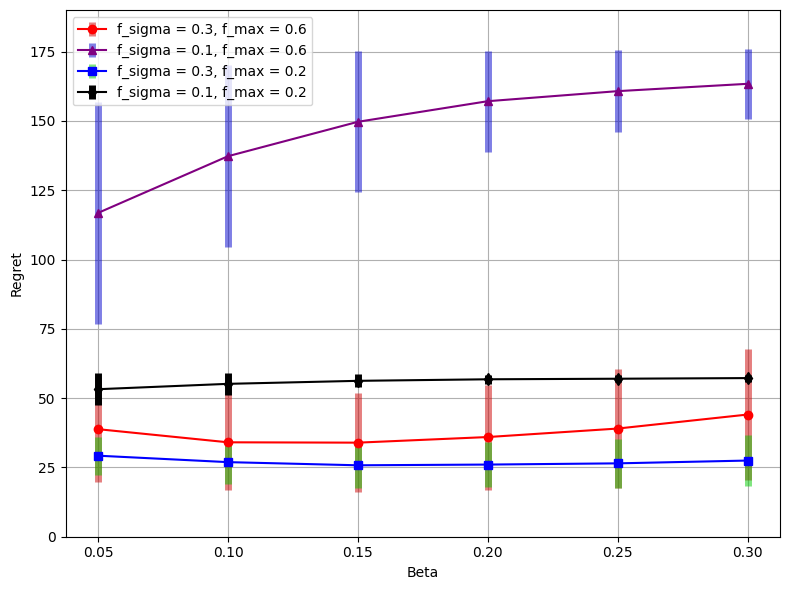

In [177]:
fig, ax = plt.subplots(figsize=(8, 6))

# Alpha vs Total Reward for f_sigma = 0.3 and f_max = 0.6
mean_alpha1 = df1.groupby('alpha')['total_reward'].mean()
std_alpha1 = df1.groupby('alpha')['total_reward'].std()
ax.errorbar(mean_alpha1.index, mean_alpha1.values, yerr=std_alpha1.values, fmt='-o', color='red', elinewidth=5, ecolor=(0.8, 0, 0, 0.5), label='f_sigma = 0.3, f_max = 0.6')

# Alpha vs Total Reward for f_sigma = 0.1 and f_max = 0.6
mean_alpha2 = df2.groupby('alpha')['total_reward'].mean()
std_alpha2 = df2.groupby('alpha')['total_reward'].std()
ax.errorbar(mean_alpha2.index, mean_alpha2.values, yerr=std_alpha2.values, fmt='-^', color='purple', elinewidth=5, ecolor=(0, 0, 0.8, 0.5), label='f_sigma = 0.1, f_max = 0.6')

# Alpha vs Total Reward for f_sigma = 0.3 and f_max = 0.2
mean_alpha3 = df3.groupby('alpha')['total_reward'].mean()
std_alpha3 = df3.groupby('alpha')['total_reward'].std()
ax.errorbar(mean_alpha3.index, mean_alpha3.values, yerr=std_alpha3.values, fmt='-s', color='blue', elinewidth=5, ecolor=(0, 0.8, 0, 0.5), label='f_sigma = 0.3, f_max = 0.2')

# Alpha vs Total Reward for f_sigma = 0.1 and f_max = 0.2
mean_alpha4 = df4.groupby('alpha')['total_reward'].mean()
std_alpha4 = df4.groupby('alpha')['total_reward'].std()
ax.errorbar(mean_alpha4.index, mean_alpha4.values, yerr=std_alpha4.values, fmt='-d', color='black', elinewidth=5, ecolor=(0, 0, 0, 1), label='f_sigma = 0.1, f_max = 0.2')

ax.set_xlabel('Beta')
ax.set_ylabel('Regret')
plt.ylim(0, 190)

ax.grid(True)
ax.legend()

plt.tight_layout()
# plt.show()
plt.savefig("./img/gp-ts_parameter_alpha.png")

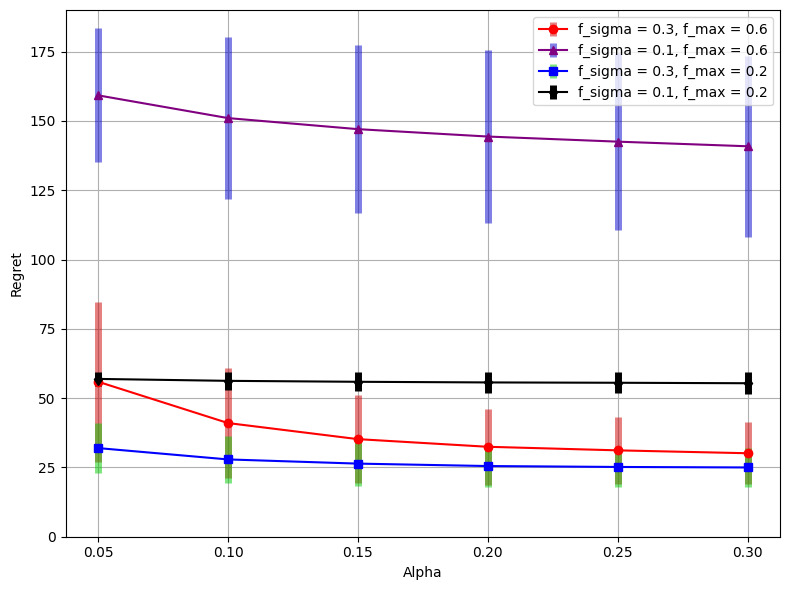

In [178]:
fig, ax = plt.subplots(figsize=(8, 6))

# Beta vs Total Reward for f_sigma = 0.3 and f_max = 0.6
mean_beta1 = df1.groupby('beta')['total_reward'].mean()
std_beta1 = df1.groupby('beta')['total_reward'].std()
ax.errorbar(mean_beta1.index, mean_beta1.values, yerr=std_beta1.values, fmt='-o', color='red', elinewidth=5, ecolor=(0.8, 0, 0, 0.5), label='f_sigma = 0.3, f_max = 0.6')

# Beta vs Total Reward for f_sigma = 0.1 and f_max = 0.6
mean_beta2 = df2.groupby('beta')['total_reward'].mean()
std_beta2 = df2.groupby('beta')['total_reward'].std()
ax.errorbar(mean_beta2.index, mean_beta2.values, yerr=std_beta2.values, fmt='-^', color='purple', elinewidth=5, ecolor=(0, 0, 0.8, 0.5), label='f_sigma = 0.1, f_max = 0.6')

# Beta vs Total Reward for f_sigma = 0.3 and f_max = 0.2
mean_beta3 = df3.groupby('beta')['total_reward'].mean()
std_beta3 = df3.groupby('beta')['total_reward'].std()
ax.errorbar(mean_beta3.index, mean_beta3.values, yerr=std_beta3.values, fmt='-s', color='blue', elinewidth=5, ecolor=(0, 0.8, 0, 0.5), label='f_sigma = 0.3, f_max = 0.2')

# Beta vs Total Reward for f_sigma = 0.1 and f_max = 0.2
mean_beta4 = df4.groupby('beta')['total_reward'].mean()
std_beta4 = df4.groupby('beta')['total_reward'].std()
ax.errorbar(mean_beta4.index, mean_beta4.values, yerr=std_beta4.values, fmt='-d', color='black', elinewidth=5, ecolor=(0, 0, 0, 1), label='f_sigma = 0.1, f_max = 0.2')

ax.set_xlabel('Alpha')
ax.set_ylabel('Regret')
plt.ylim(0, 190)
ax.grid(True)
ax.legend()

plt.tight_layout()
# plt.show()
plt.savefig("./img/gp-ts_parameter_beta.png")

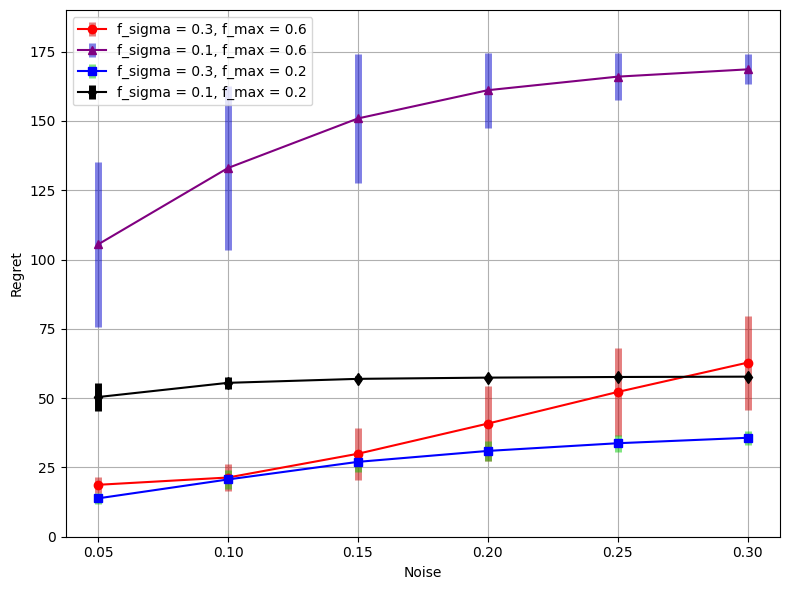

In [179]:
fig, ax = plt.subplots(figsize=(8, 6))

# Noise vs Total Reward for f_sigma = 0.3 and f_max = 0.6
mean_noise1 = df1.groupby('noise')['total_reward'].mean()
std_noise1 = df1.groupby('noise')['total_reward'].std()
ax.errorbar(mean_noise1.index, mean_noise1.values, yerr=std_noise1.values, fmt='-o', color='red', elinewidth=5, ecolor=(0.8, 0, 0, 0.5), label='f_sigma = 0.3, f_max = 0.6')

# Noise vs Total Reward for f_sigma = 0.1 and f_max = 0.6
mean_noise2 = df2.groupby('noise')['total_reward'].mean()
std_noise2 = df2.groupby('noise')['total_reward'].std()
ax.errorbar(mean_noise2.index, mean_noise2.values, yerr=std_noise2.values, fmt='-^', color='purple', elinewidth=5, ecolor=(0, 0, 0.8, 0.5), label='f_sigma = 0.1, f_max = 0.6')

# Noise vs Total Reward for f_sigma = 0.3 and f_max = 0.2
mean_noise3 = df3.groupby('noise')['total_reward'].mean()
std_noise3 = df3.groupby('noise')['total_reward'].std()
ax.errorbar(mean_noise3.index, mean_noise3.values, yerr=std_noise3.values, fmt='-s', color='blue', elinewidth=5, ecolor=(0, 0.8, 0, 0.5), label='f_sigma = 0.3, f_max = 0.2')

# Noise vs Total Reward for f_sigma = 0.1 and f_max = 0.2
mean_noise4 = df4.groupby('noise')['total_reward'].mean()
std_noise4 = df4.groupby('noise')['total_reward'].std()
ax.errorbar(mean_noise4.index, mean_noise4.values, yerr=std_noise4.values, fmt='-d', color='black', elinewidth=5, ecolor=(0, 0, 0, 1), label='f_sigma = 0.1, f_max = 0.2')

ax.set_xlabel('Noise')
ax.set_ylabel('Regret')
plt.ylim(0, 190)

ax.grid(True)
ax.legend()

plt.tight_layout()
# plt.show()
plt.savefig("./img/gp-ts_parameter_noise.png")
